In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

FILE_NAME = 'local_openai' 

In [23]:
score_df = pd.read_json(f'../data/evaluation/automatic/{FILE_NAME}.json')
score_df = score_df.drop(['Reference answer', 'LLM answer', 'Retrieved context'], axis=1)
score_df['Answer similarity score'] = score_df['Answer similarity score'] / 5

In [24]:
score_df

,Question,Answer similarity score,Retrieval precision,Augmentation precision,Augmentation accuracy,Answer consistency,Overall score
0,How does OAuth facilitate federated authentica...,0.8,0.571429,1.000000,0.857143,1.000000,0.845714
1,How does OAuth facilitate federated authentica...,0.9,0.428571,1.000000,0.714286,1.000000,0.808571
2,How does OAuth facilitate federated authentica...,0.8,0.571429,1.000000,0.714286,1.000000,0.817143
3,How does OAuth facilitate federated authentica...,0.8,0.571429,1.000000,0.857143,0.833333,0.812381
4,How does OAuth facilitate federated authentica...,0.7,0.571429,1.000000,0.571429,1.000000,0.768571
5,How is command numbering managed in iscsi prot...,0.4,0.142857,1.000000,0.428571,0.250000,0.444286
6,How is command numbering managed in iscsi prot...,0.4,0.142857,1.000000,0.857143,0.000000,0.480000
7,How is command numbering managed in iscsi prot...,0.4,0.142857,0.000000,0.142857,0.000000,0.137143
8,How is command numbering managed in iscsi prot...,0.4,0.142857,0.000000,0.142857,0.000000,0.137143
9,How is command numbering managed in iscsi prot...,0.4,0.142857,0.000000,0.285714,0.000000,0.165714


In [25]:
mean_data = score_df.groupby(['Question']).mean()
std_data = score_df.groupby('Question').std()

In [26]:
heatmap_data = pd.DataFrame(index=mean_data.index, columns=mean_data.columns)
for col in mean_data.columns:
    heatmap_data[col] = [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(mean_data[col], std_data[col])]

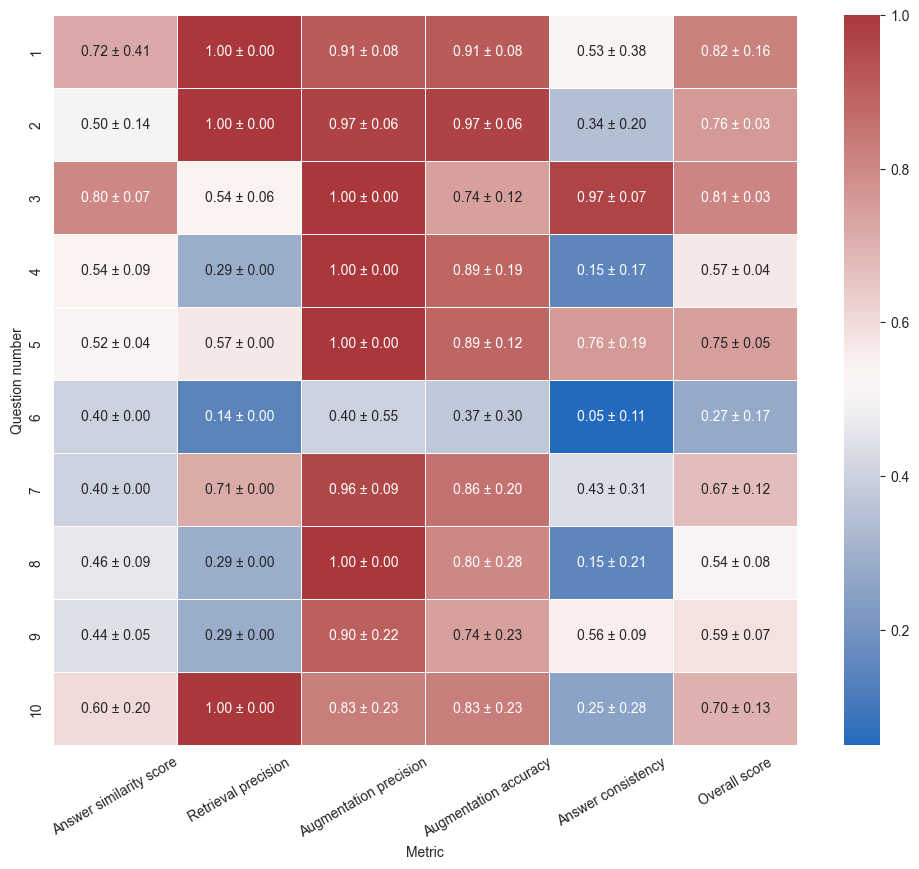

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(mean_data, annot=heatmap_data, fmt='', cmap='vlag', linewidths=.5, cbar_kws={"label": ""}, yticklabels=range(1, 11, 1))
plt.xticks(rotation=30)
plt.title('')
plt.ylabel('Question number')
plt.xlabel('Metric')
# plt.show()
plt.subplots_adjust(bottom=0.15)
plt.savefig(f'../data/evaluation/automatic/{FILE_NAME}_heatmap.png')

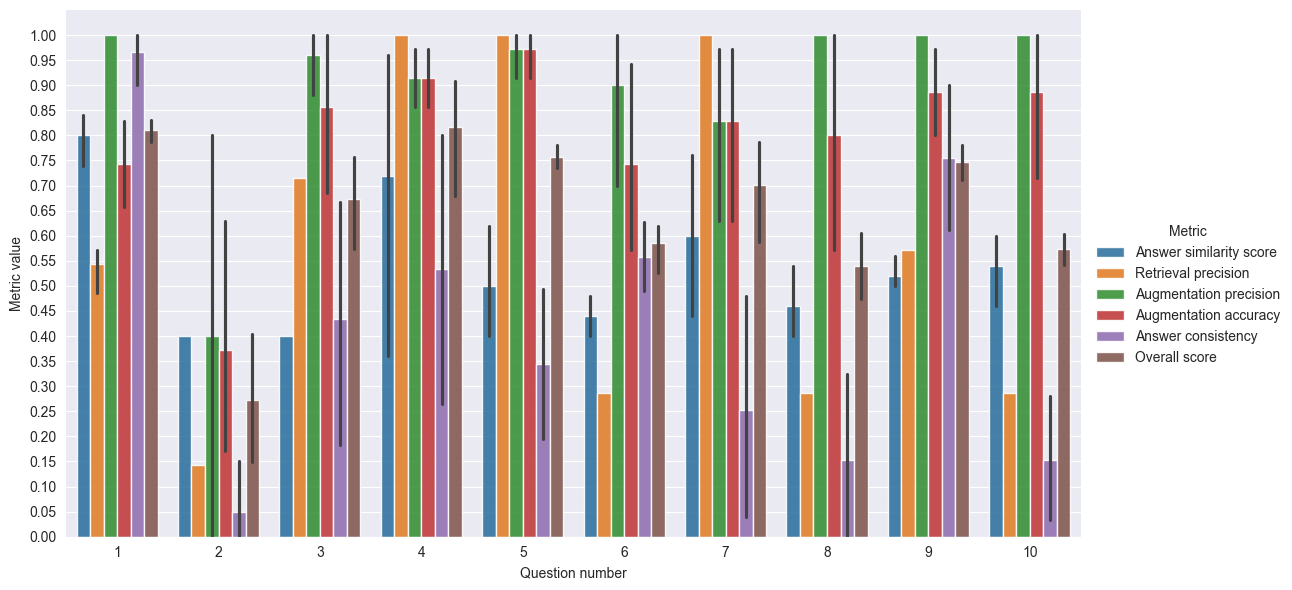

In [28]:
melted_df = pd.melt(score_df, id_vars=['Question'], var_name='Metric', value_name='Value')

# Create the grouped bar plot with standard deviation
g = sns.catplot(x='Question', y='Value', hue='Metric', data=melted_df, kind='bar', height=6, aspect=2, alpha=0.9)
g.despine(left=True)
g.set_axis_labels('Question number', 'Metric value')
# plt.title('Grouped Bar Plot with Standard Deviation')
plt.xticks(ticks=range(0,10), labels=range(1,11))
plt.yticks(ticks=np.linspace(0, 1.0, 21))
plt.savefig(f'../data/evaluation/automatic/{FILE_NAME}_catplot.png')